# PREDICTING CAR SELLING PRICE

Data yang digunakan berasal dari tautan berikut https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho
Dengan menggunakan multiple linear regression, kita dapat melakukan regresi dengan n faktor x untuk mempredisikan nilai y. Dalam kasus ini, y adalah selling_price (harga jual), sedangkan x yang dipilih berupa 3 data numerik, yaitu umur penggunaan mobil, harga saat ini, dan jumlah kilometer mobil sudah dikendarai.


## Membaca File CSV

Pembacaan file CSV dilakukan dengan memanfaatkan library CSV pada Julia. Setelah dilakukan pembacaan, maka data akan disimpan ke dalam sebuah dataframe df.
Data terdiri atas 301 baris dan 9 kolom. Berikut deskripsi dari setiap atribut data dari web sumber data:
1. Car_Name : the name of the car.
2. Year : the year in which the car was bought
3. Selling_Price : the price the owner wants to sell the car at.
4. Present_Price : the current ex-showroom price of the car.
5. Kms_Driven : This is the distance completed by the car in km.
6. Fuel : Fuel type of the car.
7. Seller_Type : Defines whether the seller is a dealer or an individual.
8. Transmission : Defines whether the car is manual or automatic.
9. Owner : Defines the number of owners the car has previously had.


In [48]:
using CSV, LinearAlgebra, Statistics, Plots, Compat, DataFrames, Random
df = CSV.read("car data.csv")

print("success loading data!")

display(df)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type
,String,Int64,Float64,Float64,Int64,String,String
1,ritz,2014,3.35,5.59,27000,Petrol,Dealer
2,sx4,2013,4.75,9.54,43000,Diesel,Dealer
3,ciaz,2017,7.25,9.85,6900,Petrol,Dealer
4,wagon r,2011,2.85,4.15,5200,Petrol,Dealer
5,swift,2014,4.6,6.87,42450,Diesel,Dealer
6,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer
7,ciaz,2015,6.75,8.12,18796,Petrol,Dealer
8,s cross,2015,6.5,8.61,33429,Diesel,Dealer
9,ciaz,2016,8.75,8.89,20273,Diesel,Dealer


success loading data!

## Melakukan Pre-Processing Data

Dari 9 kolom yang dimiliki oleh data, hanya terdapat 4 kolom bertipe data numerik yang bisa diolah dengan regresi linear. Telah ditetapkan variable y adalah atribut Selling_Price dan atribut x adalah umur penggunaan mobil, present price, dan Kms driven. Data yang tersedia adalah tahun mobil dibeli. Untuk mendapatkan usia pemakaian mobil, data harus diolah terlebih dahulu dengan mengurangi tahun saat ini (2020) dengan tahun pada kolom "Year" tabel. Lalu data tersebut disimpan dalam kolom baru bernama "Age".

In [49]:
agetemp = []
for i=1:nrow(df)
    append!(agetemp, Int64(2020-df[i,2]))
end
insertcols!(df, 3, :Age => agetemp)
df[!,:Age] = convert.(Int64,df[!,:Age])
show(df)

301×10 DataFrame. Omitted printing of 5 columns
│ Row │ Car_Name      │ Year  │ Age   │ Selling_Price │ Present_Price │
│     │ String        │ Int64 │ Int64 │ Float64       │ Float64       │
├─────┼───────────────┼───────┼───────┼───────────────┼───────────────┤
│ 1   │ ritz          │ 2014  │ 6     │ 3.35          │ 5.59          │
│ 2   │ sx4           │ 2013  │ 7     │ 4.75          │ 9.54          │
│ 3   │ ciaz          │ 2017  │ 3     │ 7.25          │ 9.85          │
│ 4   │ wagon r       │ 2011  │ 9     │ 2.85          │ 4.15          │
│ 5   │ swift         │ 2014  │ 6     │ 4.6           │ 6.87          │
│ 6   │ vitara brezza │ 2018  │ 2     │ 9.25          │ 9.83          │
│ 7   │ ciaz          │ 2015  │ 5     │ 6.75          │ 8.12          │
│ 8   │ s cross       │ 2015  │ 5     │ 6.5           │ 8.61          │
│ 9   │ ciaz          │ 2016  │ 4     │ 8.75          │ 8.89          │
│ 10  │ ciaz          │ 2015  │ 5     │ 7.45          │ 8.92          │
⋮
│ 291 │ amaze 

## Spliting dataset

Melakukan pemisahan antara data train dan test. Idealnya, 80% akan digunakan sebagai data train dan sisanya digunakan sebagai data test. Hasil pemisahan kemudian disimpan ke dalam dataframe baru untuk masing-masing data train dan data test.

In [50]:
percent_train = 0.8
n = nrow(df)
idx = shuffle(1:n)
train_idx = view(idx, 1:floor(Int, percent_train*n))
test_idx = view(idx, (floor(Int, percent_train*n)+1):n)
train_data = df[train_idx,:]
display(train_data)
test_data = df[test_idx,:]
display(test_data)

,Car_Name,Year,Age,Selling_Price,Present_Price,Kms_Driven
,String,Int64,Int64,Float64,Float64,Int64
1,jazz,2010,10,2.25,7.5,61203
2,etios cross,2015,5,4.5,7.27,40534
3,i10,2011,9,2.7,4.6,22517
4,city,2006,14,2.1,7.6,50456
5,fortuner,2014,6,18.75,35.96,78000
6,brio,2015,5,5.4,6.1,31427
7,Royal Enfield Classic 500,2012,8,0.95,1.75,11500
8,amaze,2014,6,3.9,7.0,36054
9,city,2009,11,3.35,11.0,87934


,Car_Name,Year,Age,Selling_Price,Present_Price,Kms_Driven
,String,Int64,Int64,Float64,Float64,Int64
1,etios liva,2014,6,4.75,6.95,45000
2,innova,2016,4,20.75,25.39,29000
3,KTM RC200,2017,3,1.65,1.78,4000
4,Honda Karizma,2011,9,0.35,1.05,30000
5,alto k10,2010,10,1.95,3.95,44542
6,etios g,2014,6,4.75,6.76,40000
7,corolla altis,2017,3,17.0,18.64,8700
8,Yamaha FZ v 2.0,2016,4,0.6,0.84,25000
9,Hero Honda Passion Pro,2012,8,0.3,0.51,60000


Selanjutnya dilakukan pemisahan atribut untuk variable x dan y agar mudah memproses data dalam regresi linear.

In [51]:
x_train = select(train_data, [:"Age", :"Present_Price", :"Kms_Driven"])
y_train = select(train_data, [:"Selling_Price"])

,Selling_Price
,Float64
1,2.25
2,4.5
3,2.7
4,2.1
5,18.75
6,5.4
7,0.95
8,3.9
9,3.35


##  Linear Regression
Import module linearRegression yang telah dibuat di file terpisah linear_regression.jl. Selanjutnya dikonstruksi sebuah struct regression dengan 7 parameter.
1. xdata : data untuk variable x
2. ydata : data untuk variable y
3. num_data : banyaknya baris data
4. num_free_var : banyaknya variable bebas(x)
5. xmatrix : matrix untuk menyimpan nilai variable x
6. ymatrix : matrix untuk menyimpan nilai variable y
7. bmatrix : matrix untuk menyimpan nilai B hasil perhitungan

dengan memanggil fungsi train, akan dilakukan regresi terhadap data train sehingga menghasilkan persamaan fitted regression model sebagai berikut.

In [52]:
include("linear_regression.jl")
using .linearRegression

num_data = nrow(x_train)
num_free_var = 3
regression = linearRegression.regression(x_train, y_train, num_data, num_free_var,[],[],[])
bmatrix = linearRegression.train(regression)

The fitted regression model:
ŷ = 3.9645449320058592 -0.5149898523723869x1 +0.5028432499324736x2 +8.805994775195787e-7x3 


4×1 Array{Float64,2}:
  3.9645449320058592
 -0.5149898523723869
  0.5028432499324736
  8.805994775195787e-7

Sebelum melakukan prediksi terhadap data test, dilakukan pemisahan terlebih dahulu untuk kolom-kolom pada tabel yang ditentukan sebagai variable x dan y

In [53]:
x_test = select(test_data, [:"Age", :"Present_Price", :"Kms_Driven"])
y_test = select(test_data, [:"Selling_Price"])

,Selling_Price
,Float64
1,4.75
2,20.75
3,1.65
4,0.35
5,1.95
6,4.75
7,17.0
8,0.6
9,0.3


## Melakukan Prediksi dan Menunjukkan Akurasi Algoritma
Untuk melakukan prediksi terhadap data test, dapat memanggil fungsi test yang akan menghitung nilai y prediksi berdasarkan persamaan yang diperoleh dari fungsi train sebelumnya. Fungsi ini juga akan menampilkan setiap nilai x1, x2, x3, y, y prediksi, dan selisih y dengan y prediksi.

Akurasi dan error perhitungan akan ditampilkan dalam Mean Square Error (MSE), Root Mean Square Error (RMSE), dan RSquare.

In [54]:
result = linearRegression.test(regression, x_test, y_test,nrow(x_test))

x1		x2		x3		y		ŷ		y-ŷ
6.0		6.95		45000.0		4.75		4.40899		0.34101
4.0		25.39		29000.0		20.75		14.69731	6.05269
3.0		1.78		4000.0		1.65		3.31816		-1.66816
9.0		1.05		30000.0		0.35		-0.11596	0.46596
10.0		3.95		44542.0		1.95		0.8401		1.1099
6.0		6.76		40000.0		4.75		4.30905		0.44095
3.0		18.64		8700.0		17.0		11.80023	5.19977
4.0		0.84		25000.0		0.6		2.34899		-1.74899
8.0		0.51		60000.0		0.3		0.15391		0.14609
6.0		0.826		23000.0		0.45		1.31021		-0.86021
6.0		0.81		42000.0		0.42		1.31889		-0.89889
4.0		0.55		1000.0		0.45		2.18203		-1.73203
3.0		6.49		16200.0		6.0		5.69729		0.30271
5.0		13.46		38000.0		12.5		8.19133		4.30867
12.0		0.787		50000.0		0.2		-1.77557	1.97557
5.0		5.7		34797.0		5.15		4.28644		0.86356
9.0		4.6		53460.0		2.95		1.68979		1.26021
5.0		5.8		40023.0		4.0		4.34133		-0.34133
6.0		0.64		13700.0		0.4		1.20849		-0.80849
6.0		6.4		19000.0		4.5		4.10953		0.39047
9.0		0.57		35000.0		0.15		-0.35292	0.50292
5.0		30.61		40000.0		23.0		16.81685	6.18315
9.0		10.0		69341.0		4.1		4.41913

61-element Array{Float64,1}:
  4.40899338129061
 14.697313023149887
  3.31815875767858
 -0.11596034259093826
  0.8401009074429384
  4.309050166415842
 11.800234769084428
  2.348988839397579
  0.1539121391435001
  1.310208130198711
  1.3188940282726636
  2.1820299094566917
  5.697293778486269
  ⋮
 -0.6838763183891312
  2.238736995302143
  3.802100815721273
  2.1441857384012533
  3.826257362759224
  4.328710387682218
  2.6393870541349598
  1.1528156978092958
  4.675245139389029
  4.277533628665252
  3.709275770787094
  2.3130243188049273

## Visualisasi Hasil Prediksi
Terakhir, dilakukan visualisasi hasil prediksi. Visualisasi memanfaatkan library Plots dari Julia. Grafik yang ditampilkan terdiri atas scatter plot untuk menampilkan nilai data test sesungguhnya dan menampilkan plot line hasil regresi (model).

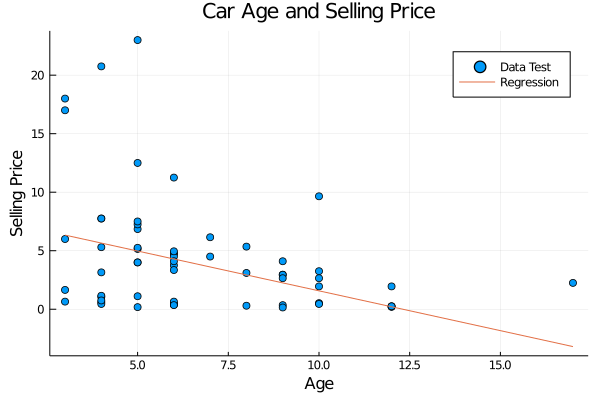

In [55]:
x1 = test_data[:, "Age"]
y1 = test_data[:, "Selling_Price"]
p1 = scatter(x1,y1, label = "Data Test")


A1 = [ones(61) x1]
c1 = A1\result
y_axis1 = c1[1]*ones(61) + c1[2]*x1

xlabel!("Age", fontsize = 20)
ylabel!("Selling Price", fontsize = 20)
p1 = plot!(x1, y_axis1, label = "Regression")
plot(p1, title = "Car Age and Selling Price")

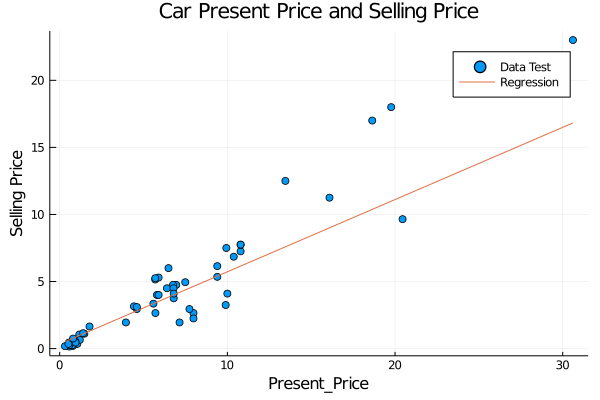

In [56]:
x2 = test_data[:, "Present_Price"]
y2 = test_data[:, "Selling_Price"]
p2 = scatter(x2,y2, label = "Data Test")

A2 = [ones(length(x2)) x2]
c2 = A2\result
y_axis2 = c2[1]*ones(length(x2)) + c2[2]*x2

xlabel!("Present_Price", fontsize = 20)
ylabel!("Selling Price", fontsize = 20)
p2 = plot!(x2, y_axis2, label = "Regression")
plot(p2, title = "Car Present Price and Selling Price")

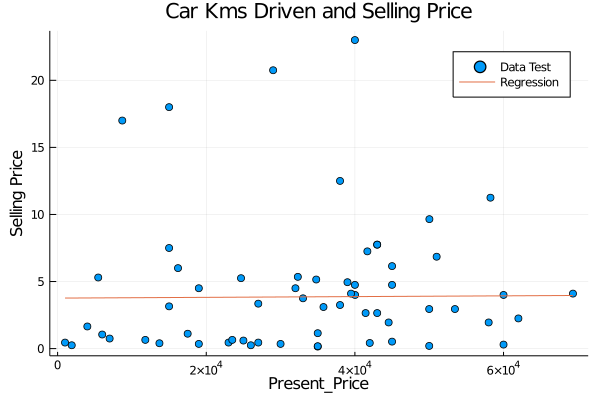

In [57]:
x3 = test_data[:, "Kms_Driven"]
y3 = test_data[:, "Selling_Price"]
p3 = scatter(x3,y3, label = "Data Test")

A3 = [ones(length(x3)) x3]
c3 = A3\result
y_axis3 = c3[1]*ones(length(x3)) + c3[2]*x3

xlabel!("Present_Price", fontsize = 20)
ylabel!("Selling Price", fontsize = 20)
p3 = plot!(x3, y_axis3, label = "Regression")
plot(p3, title = "Car Kms Driven and Selling Price")